In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns


import numpy as np
import pandas as pd
import tensorflow as tf

import atecml.data
import atecml.fs

from contextlib import contextmanager
from tqdm import tqdm
from time import strftime,time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import joblib
from concurrent.futures import ProcessPoolExecutor

plt.style.use('ggplot')

In [3]:
#训练集为过滤掉所有unknown标签的
num_cat = 100


train_df= atecml.data.load_train()
train_df.loc[train_df.label != 1, 'Fraud'] = 0
train_df.loc[train_df.label == 1, 'Fraud'] = 1
target ='Fraud'


Temp1 = [x for x in train_df.columns if x not in atecml.data.NOT_FEATURE_COLUMNS2]

predictors = [x for x in Temp1 if x not in atecml.data.MORE_THAN_20PCT_MISSING]

#F5可能是一个地域标签，聚类分组一下
#train_df['f5'] =train_df['f5']//100

In [4]:
iv_list = {}
woe_table = {}
type_list = {}

nan_result = atecml.data.calc_iv(df=train_df,feature='NaN_LIST',target=target,category_num=64)        
niv = nan_result[0]
nwoe_df = nan_result[1]
nfeature_type = nan_result[2]
iv_list.update(niv)
woe_table.update(nwoe_df)
type_list.update(nfeature_type)

def mt_iv(feature):
    return atecml.data.calc_iv(df=train_df,feature=feature,target=target,category_num=num_cat)

with ProcessPoolExecutor(max_workers=40) as pool:
    for pool_result in pool.map(mt_iv,predictors):
        iv = pool_result[0]
        woe_df = pool_result[1]
        feature_type = pool_result[2]
        iv_list.update(iv)
        woe_table.update(woe_df)
        type_list.update(feature_type)

[2018-07-07 14:30:31][WoE/IV Calculation for NaN_LIST] Begin ...
[2018-07-07 14:31:02][WoE/IV Calculation for NaN_LIST] End   ...[Elapsed: 31.63s]
[2018-07-07 14:31:05][WoE/IV Calculation for f1] Begin ...
[2018-07-07 14:31:05][WoE/IV Calculation for f12] Begin ...
[2018-07-07 14:31:05][WoE/IV Calculation for f7] Begin ...
[2018-07-07 14:31:05][WoE/IV Calculation for f10] Begin ...
[2018-07-07 14:31:05][WoE/IV Calculation for f4] Begin ...
[2018-07-07 14:31:05][WoE/IV Calculation for f13] Begin ...
[2018-07-07 14:31:05][WoE/IV Calculation for f11] Begin ...
[2018-07-07 14:31:05][WoE/IV Calculation for f8] Begin ...
[2018-07-07 14:31:05][WoE/IV Calculation for f6] Begin ...
[2018-07-07 14:31:05][WoE/IV Calculation for f9] Begin ...
[2018-07-07 14:31:05][WoE/IV Calculation for f2] Begin ...
[2018-07-07 14:31:05][WoE/IV Calculation for f3] Begin ...
[2018-07-07 14:31:05][WoE/IV Calculation for f14] Begin ...
[2018-07-07 14:31:05][WoE/IV Calculation for f15] Begin ...
[2018-07-07 14:31:05]

[2018-07-07 14:32:27][WoE/IV Calculation for f194] End   ...[Elapsed: 36.72s]
[2018-07-07 14:32:27][WoE/IV Calculation for f224] Begin ...
[2018-07-07 14:32:27][WoE/IV Calculation for f195] End   ...[Elapsed: 36.80s]
[2018-07-07 14:32:27][WoE/IV Calculation for f225] Begin ...
[2018-07-07 14:32:29][WoE/IV Calculation for f201] End   ...[Elapsed: 36.26s]
[2018-07-07 14:32:29][WoE/IV Calculation for f226] Begin ...
[2018-07-07 14:32:30][WoE/IV Calculation for f202] End   ...[Elapsed: 37.71s]
[2018-07-07 14:32:30][WoE/IV Calculation for f227] Begin ...
[2018-07-07 14:32:31][WoE/IV Calculation for f187] End   ...[Elapsed: 41.72s]
[2018-07-07 14:32:31][WoE/IV Calculation for f228] Begin ...
[2018-07-07 14:32:31][WoE/IV Calculation for f186] End   ...[Elapsed: 42.22s]
[2018-07-07 14:32:31][WoE/IV Calculation for f229] Begin ...
[2018-07-07 14:32:32][WoE/IV Calculation for f189] End   ...[Elapsed: 43.13s]
[2018-07-07 14:32:32][WoE/IV Calculation for f230] Begin ...
[2018-07-07 14:32:34][WoE/I

[2018-07-07 14:33:29][WoE/IV Calculation for f243] End   ...[Elapsed: 46.81s]
[2018-07-07 14:33:30][WoE/IV Calculation for f253] End   ...[Elapsed: 38.09s]
[2018-07-07 14:33:31][WoE/IV Calculation for f246] End   ...[Elapsed: 45.78s]
[2018-07-07 14:33:31][WoE/IV Calculation for f249] End   ...[Elapsed: 44.51s]
[2018-07-07 14:33:34][WoE/IV Calculation for f242] End   ...[Elapsed: 51.20s]
[2018-07-07 14:33:35][WoE/IV Calculation for f254] End   ...[Elapsed: 43.21s]
[2018-07-07 14:33:35][WoE/IV Calculation for f252] End   ...[Elapsed: 45.93s]
[2018-07-07 14:33:37][WoE/IV Calculation for f257] End   ...[Elapsed: 39.91s]
[2018-07-07 14:33:38][WoE/IV Calculation for f255] End   ...[Elapsed: 43.63s]
[2018-07-07 14:33:39][WoE/IV Calculation for f256] End   ...[Elapsed: 43.89s]
[2018-07-07 14:33:40][WoE/IV Calculation for f261] End   ...[Elapsed: 37.64s]
[2018-07-07 14:33:40][WoE/IV Calculation for f260] End   ...[Elapsed: 39.35s]
[2018-07-07 14:33:40][WoE/IV Calculation for f259] End   ...[Ela

In [5]:
iv_df = pd.DataFrame()
iv_df['IV'] = pd.DataFrame.from_dict(iv_list,orient='index')[0]
iv_df['Type'] = pd.DataFrame.from_dict(type_list,orient='index')[0]
iv_df.sort_values('IV',ascending=False).head(20)

,IV,Type
f261,2.026063,value
f260,2.021908,value
f259,1.988966,value
f262,1.875871,value
f264,1.854064,value
f271,1.838878,value
f270,1.769346,category
f265,1.742149,value
f263,1.672139,value
f266,1.571489,value


In [6]:
iv_df.loc['NaN_LIST']

IV      0.753456
Type    category
Name: NaN_LIST, dtype: object

In [7]:
#important_feature = list(iv_df[ (iv_df.IV > 0.3) & (iv_df.IV < 0.8)].index)
important_feature = list(iv_df[ iv_df.IV > 0.3 ].index)

In [8]:
filter_feature = important_feature 
#filter_feature = list(iv_df.index)
#list(set(important_feature) -set(atecml.data.NOT_IMP_FEATURE))
print(len(filter_feature))
rename_dict ={}
new_filter_feature_list = []
for item in filter_feature:
    old_feature_name = item
    new_feature_name = 'n_' + item
    new_filter_feature_list.append(new_feature_name)
    rename_dict[old_feature_name] = new_feature_name

90


In [9]:
joblib.dump(new_filter_feature_list,'./woe_feature.dat')

['./woe_feature.dat']

In [10]:
test_df = atecml.data.load_train()

'''
test_df['f5'] =test_df['f5']//100

a = train_df['f5'].unique()
test_df['f5'][~test_df['f5'].isin(a)] =np.nan
'''

def mt_conv_test(feature):
    return atecml.data.woe_convert(df=test_df,feature=feature,woe_table=woe_table,type_list=type_list,category_num=num_cat)

new_feature_tt =[]
with ProcessPoolExecutor(max_workers=60) as pool:
    for pool_result in pool.map(mt_conv_test,predictors):
        new_feature_tt.append(pool_result)

nan_result = mt_conv_test('NaN_LIST')   
new_feature_tt.append(nan_result)
        
_t_new_tt_df = pd.concat(new_feature_tt,axis=1)

_t_new_tt_df = _t_new_tt_df[filter_feature]

mean = _t_new_tt_df.mean(axis=1)
variance = _t_new_tt_df.var(axis=1)
skew = _t_new_tt_df.skew(axis=1)
_t_new_tt_df['mean'] = mean
#_t_new_tt_df['variance'] = variance
#_t_new_tt_df['skew'] = skew
_t_new_tt_df.rename(columns=rename_dict,inplace=True)
ext_tt_dfa = pd.concat([test_df,_t_new_tt_df],axis=1)
#

In [11]:
ext_tt_dfa[ext_tt_dfa['mean']<-0.75][['mean','label']].groupby('label').describe()

mean                                                              \
          count      mean       std       min       25%       50%       75%   
label                                                                         
-1       1621.0 -0.945483  0.130346 -2.057711 -1.019824 -0.891671 -0.864155   
 0     129361.0 -0.964262  0.098503 -2.002667 -1.041358 -0.958602 -0.879430   
 1       5485.0 -1.043090  0.131767 -1.734361 -1.148400 -1.069496 -0.913331   

                 
            max  
label            
-1    -0.773761  
 0    -0.751764  
 1    -0.751229

In [12]:
ext_tt_dfa[ (ext_tt_dfa['mean']>-0.5) & (ext_tt_dfa['mean']<=-0.2)][['mean','label']].groupby('label').describe()

mean                                                              \
        count      mean       std       min       25%       50%       75%   
label                                                                       
-1      298.0 -0.264039  0.059014 -0.490274 -0.286395 -0.250419 -0.222031   
 0     3294.0 -0.259911  0.053567 -0.499052 -0.278410 -0.247567 -0.222679   
 1     1227.0 -0.278265  0.058343 -0.494119 -0.301258 -0.267539 -0.237568   

                 
            max  
label            
-1    -0.200104  
 0    -0.200010  
 1    -0.200056

In [13]:
ext_tt_dfa[ (ext_tt_dfa['mean']>-0.2) & (ext_tt_dfa['mean']<=0.2)][['mean','label']].groupby('label').describe()

mean                                                              \
         count      mean       std       min       25%       50%       75%   
label                                                                        
-1      1566.0 -0.000570  0.111403 -0.199757 -0.090296 -0.008915  0.100302   
 0     28640.0  0.041991  0.112108 -0.199985 -0.043218  0.058778  0.141317   
 1      2897.0 -0.005275  0.110102 -0.199933 -0.097073 -0.007006  0.087451   

                 
            max  
label            
-1     0.199894  
 0     0.199988  
 1     0.199977

In [14]:
ext_tt_dfa[ext_tt_dfa['mean']>0.2][['mean','label']].groupby('label').describe()

mean                                                              \
          count      mean       std       min       25%       50%       75%   
label                                                                         
-1       1211.0  0.402598  0.124816  0.200392  0.300139  0.378145  0.522547   
 0     816371.0  0.559524  0.112535  0.200014  0.494733  0.579367  0.640042   
 1       2331.0  0.386644  0.114543  0.200079  0.292660  0.370416  0.486262   

                 
            max  
label            
-1     0.757213  
 0     0.931394  
 1     0.716290

In [15]:
foo = ext_tt_dfa[['mean','label']]

foo.groupby('label').describe()

mean                                                              \
          count      mean       std       min       25%       50%       75%   
label                                                                         
-1       4725.0 -0.241629  0.557298 -2.057711 -0.866470 -0.085027  0.209198   
 0     977884.0  0.339769  0.530578 -2.002667  0.400632  0.550432  0.628094   
 1      12122.0 -0.436317  0.598306 -1.734361 -1.047440 -0.290158  0.091259   

                 
            max  
label            
-1     0.757213  
 0     0.931394  
 1     0.716290

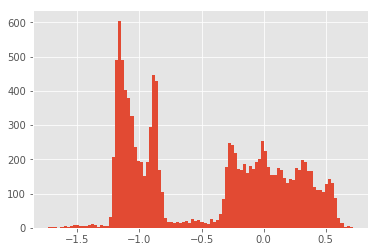

In [16]:
foo[foo.label==1]['mean'].hist(bins=100)

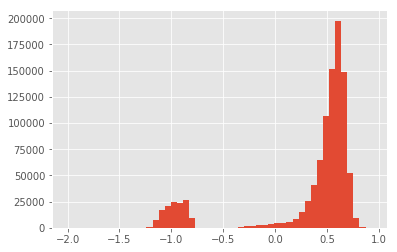

In [17]:
foo[foo.label==0]['mean'].hist(bins=50)

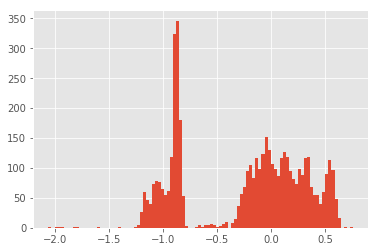

In [18]:
foo[foo.label==-1]['mean'].hist(bins=100)

In [19]:
ext_tt_dfa.to_pickle('./01_train.dat')

In [20]:
test_df = atecml.data.load_test()
'''
test_df['f5'] =test_df['f5']//100

a = train_df['f5'].unique()
test_df['f5'][~test_df['f5'].isin(a)] =np.nan
'''
def mt_conv_test(feature):
    return atecml.data.woe_convert(df=test_df,feature=feature,woe_table=woe_table,type_list=type_list,category_num=num_cat)

new_feature_tt =[]
with ProcessPoolExecutor(max_workers=60) as pool:
    for pool_result in pool.map(mt_conv_test,predictors):
        new_feature_tt.append(pool_result)

nan_result = mt_conv_test('NaN_LIST')   
new_feature_tt.append(nan_result)        
        
_t_new_tt_df = pd.concat(new_feature_tt,axis=1)

_t_new_tt_df = _t_new_tt_df[filter_feature]

mean = _t_new_tt_df.mean(axis=1)
variance = _t_new_tt_df.var(axis=1)
skew = _t_new_tt_df.skew(axis=1)
_t_new_tt_df['mean'] = mean
#_t_new_tt_df['variance'] = variance
#_t_new_tt_df['skew'] = skew
_t_new_tt_df.rename(columns=rename_dict,inplace=True)
ext_tt_df = pd.concat([test_df,_t_new_tt_df],axis=1)
ext_tt_df.to_pickle('./01_test.dat')

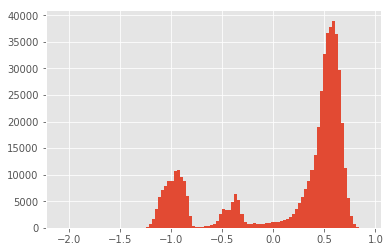

In [21]:
ext_tt_df['mean'].hist(bins=100)